In [61]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('../Datasets/cardio_train.csv', sep=';')
print(df.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [76]:
df['age_in_yrs'] = df['age'] // 365

In [77]:
df.drop('id', axis=1, inplace=True)

In [78]:
print("Shape of dataset: ", df.shape)
print("\nColumn names:\n", df.columns)
print("\nData types:\n",df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset:  (70000, 13)

Column names:
 Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_in_yrs'],
      dtype='object')

Data types:
 age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
age_in_yrs       int64
dtype: object

Missing values:
 age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_in_yrs     0
dtype: int64


In [79]:
print("\nStatistical Summary:\n", df.describe)


Statistical Summary:
 <bound method NDFrame.describe of          age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2

In [80]:
print("\nTarget value counts (cardio column): ")
print(df['cardio'].value_counts())


Target value counts (cardio column): 
cardio
0    35021
1    34979
Name: count, dtype: int64


In [81]:
!pip install seaborn



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


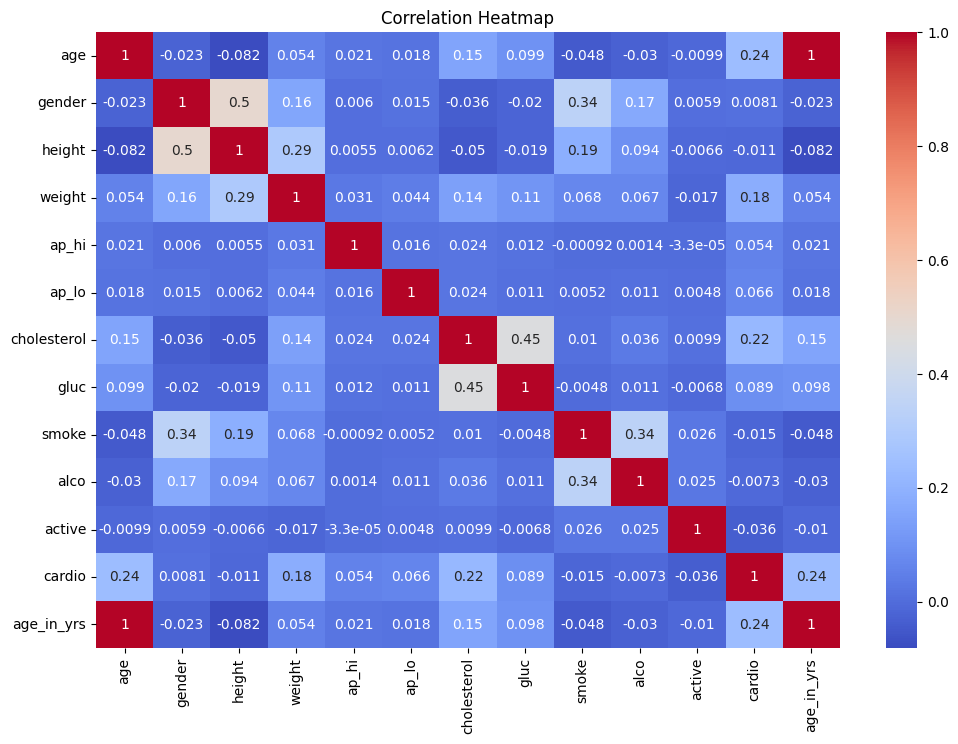

In [82]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

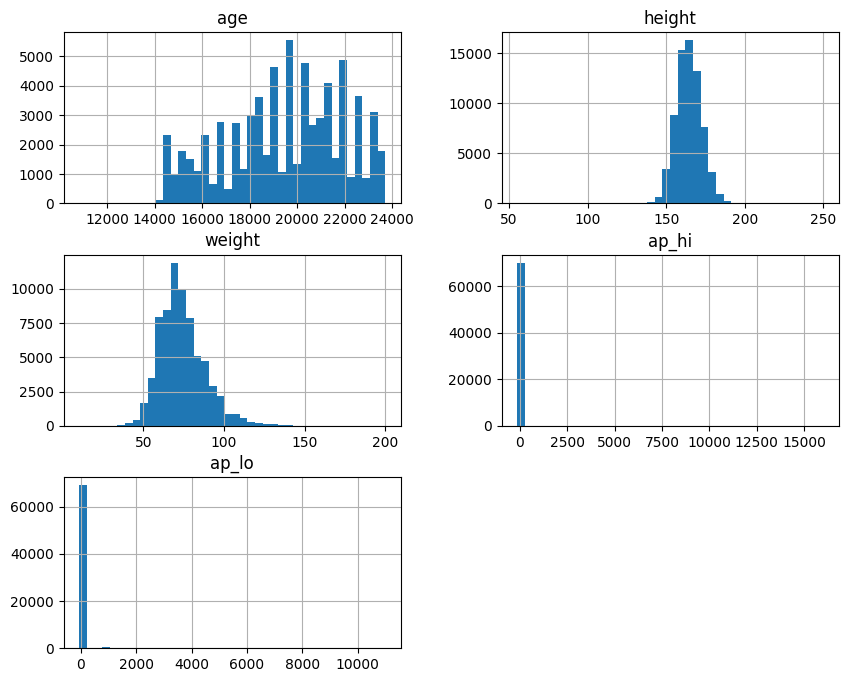

In [83]:
numeric_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
df[numeric_cols].hist(bins=40, figsize=(10,8))
plt.show()


In [84]:
!pip install scikit-learn



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_yrs
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
5,21914,1,151,67.0,120,80,2,2,0,0,0,0,60
6,22113,1,157,93.0,130,80,3,1,0,0,1,0,60
7,22584,2,178,95.0,130,90,3,3,0,0,1,1,61
8,17668,1,158,71.0,110,70,1,1,0,0,1,0,48
9,19834,1,164,68.0,110,60,1,1,0,0,0,0,54


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_logi = df.drop(columns=['age', 'cardio'])
X = df_logi
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_cols = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_in_yrs']
scalar = StandardScaler()
X_train[num_cols] = scalar.fit_transform(X_train[num_cols])
X_test[num_cols] = scalar.transform(X_test[num_cols])

In [91]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 3.4 MB/s eta 0:00:22
    --------------------------------------- 1.6/72.0 MB 4.4 MB/s eta 0:00:16
   - -------------------------------------- 2.6/72.0 MB 4.6 MB/s eta 0:00:16
   -- ------------------------------------- 3.9/72.0 MB 5.1 MB/s eta 0:00:14
   -- ------------------------------------- 5.2/72.0 MB 5.4 MB/s eta 0:00:13
   --- ------------------------------------ 6.3/72.0 MB 5.2 MB/s eta 0:00:13
   ---- ----------------------------------- 7.6/72.0 MB 5.3 MB/s eta 0:00:13
   ----- ---------------------------------- 9.2/72.0 MB 5.5 MB/s eta 0:00:12
   ----- ---------------------------------- 10.7/72.0 MB 5.7 MB/s eta 0:00:11
   ------ --------------------------------- 12.1/72.0 MB 5.9 MB/s eta 0:00:11
   ------- -------------------------------- 13.4/72.0 MB 5.9 MB/s eta 0:00:10
   -------- ------------------------------- 14.9/72.0 MB 6.0 MB/s eta 0:00:10
  


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample' : [0.8, 0.9, 1.0]
}

xgb = XGBClassifier(random_state = 42)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy', n_jobs=1)
xgb_grid.fit(X_train, y_train)

print("XGBoost Best Params: ", xgb_grid.best_params_)
print("XGBoost Best Score: ", xgb_grid.best_score_)


XGBoost Best Params:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
XGBoost Best Score:  0.7357857142857143


In [94]:
!pip install joblib



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
import joblib

joblib.dump(xgb_grid.best_estimator_, '../Models/cardiovascular.pkl')


['../Models/cardiovascular.pkl']